In [14]:
using CovidSim

In [15]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 5, nil, agegrps)
seed_6_12 = seed_case_gen(8, [0,6,6,0,0], 5, nil, agegrps)

(::CovidSim.var"#scase#69"{CovidSim.var"#scase#68#70"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [16]:
alldict, dseries, starting_unexposed = run_a_sim(180,11, silent=true,
        spreadcases=[], 
        runcases=[seed_1_6, seed_6_12]);
geo = alldict["geo"];

*** seed day 1 locale 11....
*** seed day 8 locale 11....
Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


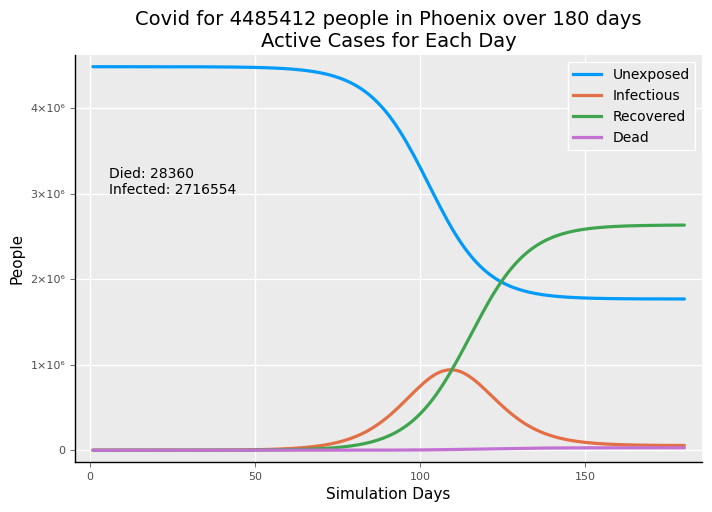

In [17]:
cumplot(dseries,11,geo=geo)

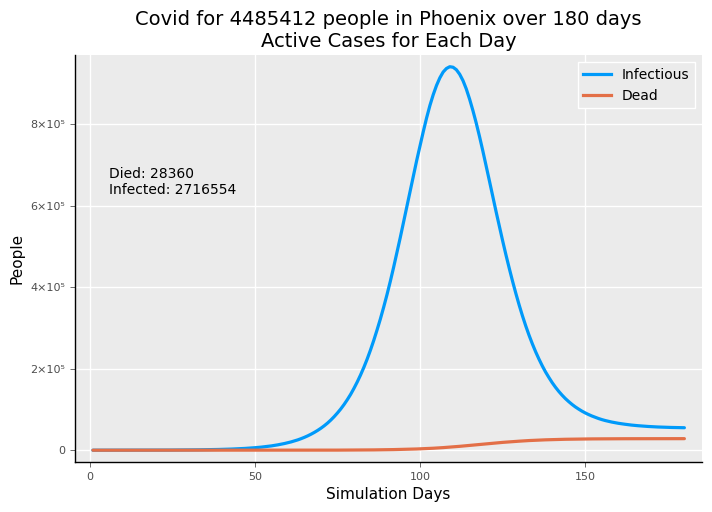

In [18]:
cumplot(dseries,11,geo=geo, [:Infectious, :Dead])

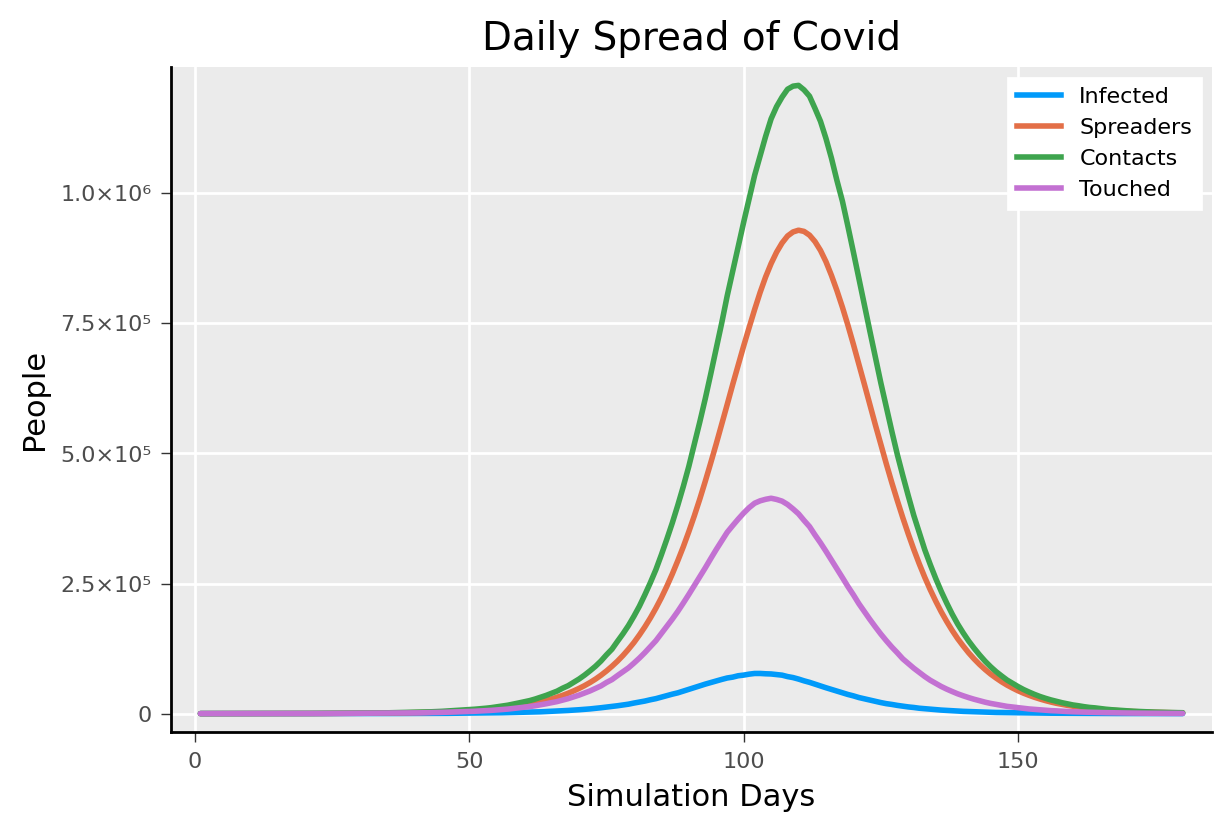

In [19]:
dayplot(spreadq,[:spreaders, :contacts, :touched])

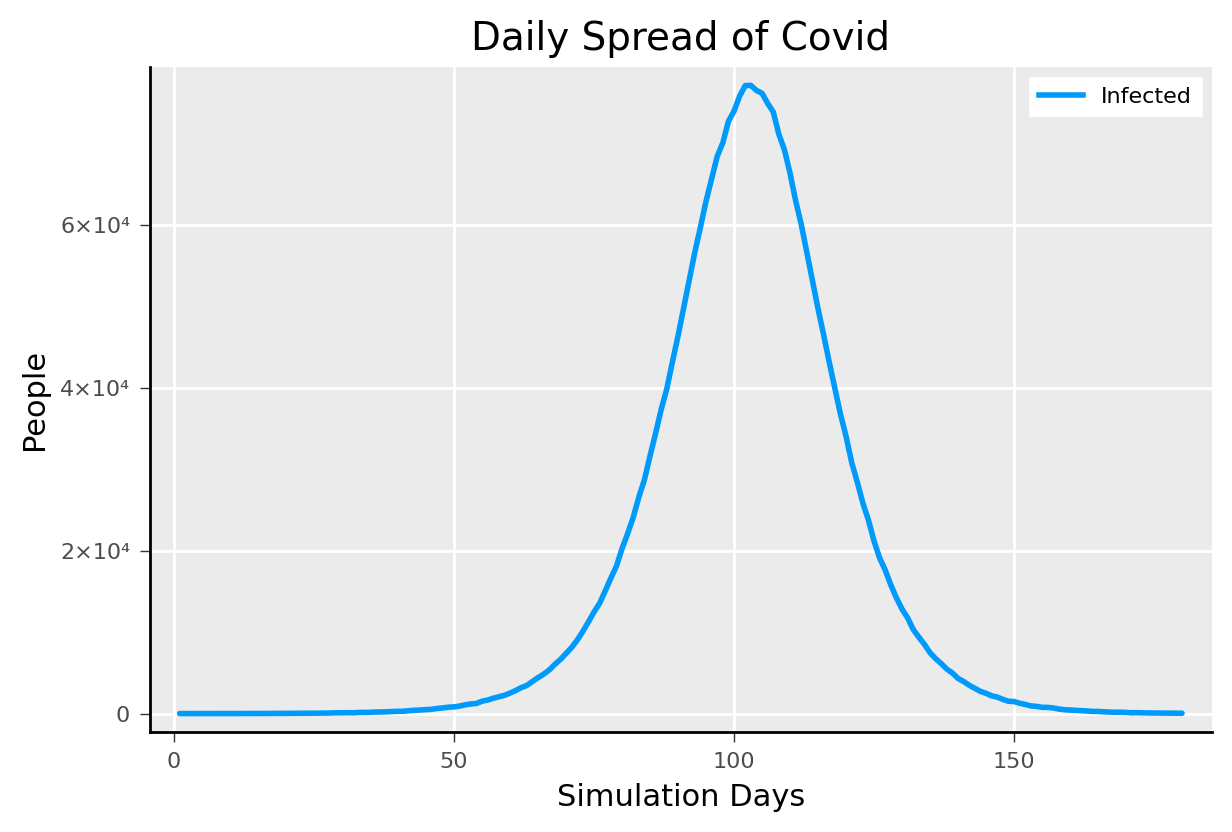

In [20]:
dayplot(spreadq)

#### Social Distancing

Here is a case when social distancing starts on day 60 with 75% compliance and is rather strong in terms of contacts and touches.

In [21]:
str_60 = sd_gen(start=60, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, dseries, starting_unexposed = run_a_sim(180,11, silent=true,
    spreadcases=[str_60], 
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 11....
*** seed day 8 locale 11....


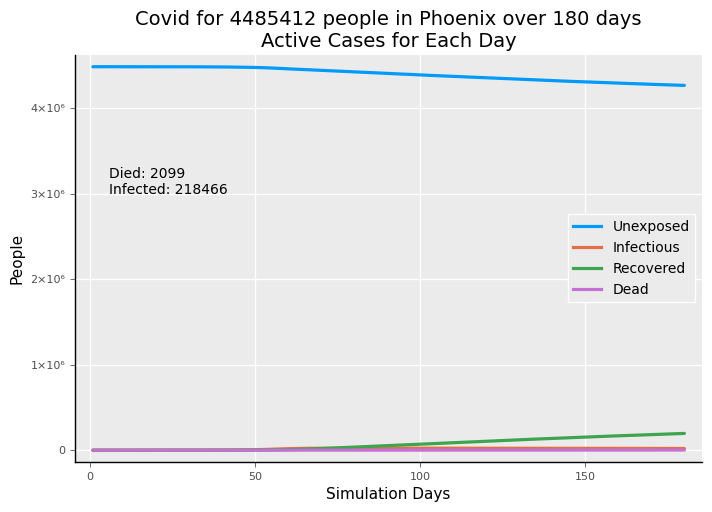

Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


In [21]:
cumplot(dseries, 11, geo=geo)

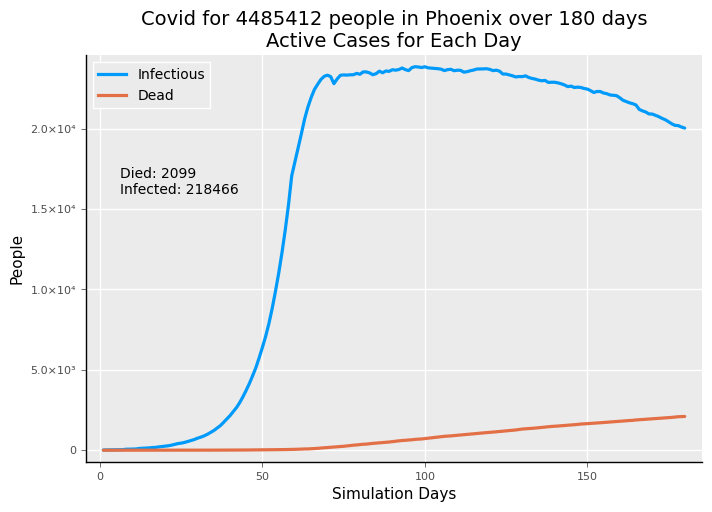

In [22]:
cumplot(dseries, 11, [:Infectious, :Dead],geo=geo)

In [23]:
76670/2605750

0.029423390578528254

In [24]:
str_50 = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, dseries, starting_unexposed = run_a_sim(180, 11, silent=true,
    spreadcases=[str_50],
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 11....
*** seed day 8 locale 11....


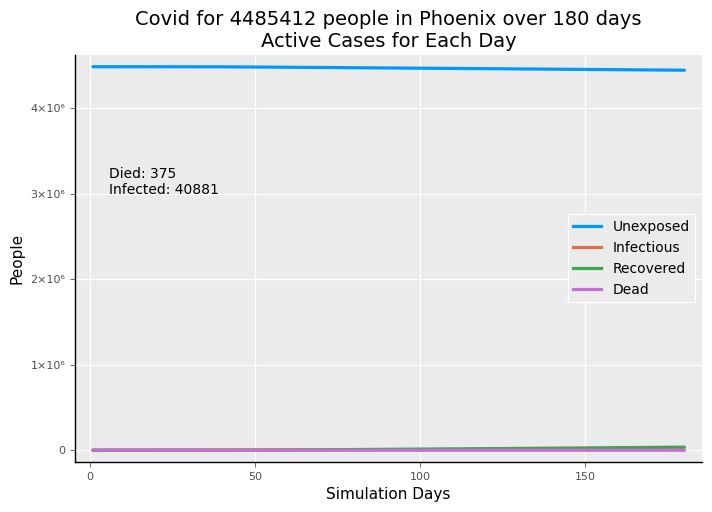

Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


In [24]:
cumplot(dseries, 11, geo=geo)

We cut not quite another 30% of infections compared to starting isolation 10 days later.  With exponential growth, 
when you start mitigation practices makes a big difference. 

Looking at this the authorities could say, "We are in great shape; we have this virus licked." 

Let's see what happens if we open up to where we were before after 30 days of social distancing.

In [25]:
open_all = sd_gen(start=80, comply=0.0, cf=(.2,1.8), tf=(.18,.62)); 
alldict, dseries, starting_unexposed = run_a_sim(180,11,silent=true,
    spreadcases=[str_50,open_all],
    runcases=[seed_1_6, seed_6_12]);  

*** seed day 1 locale 11....
*** seed day 8 locale 11....


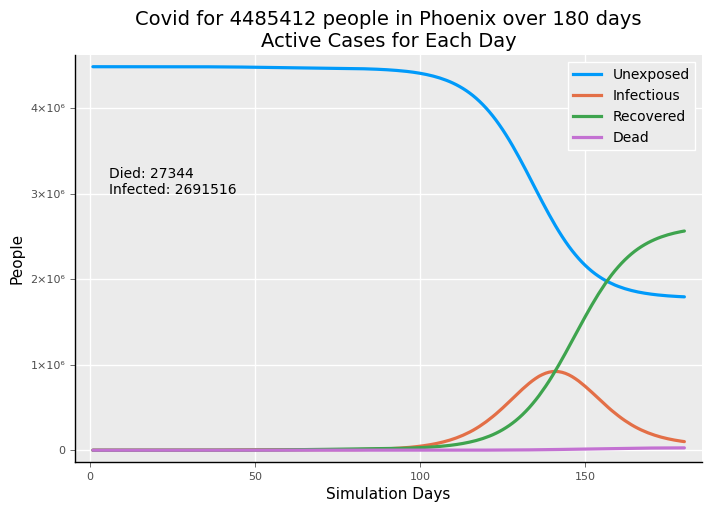

Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


In [25]:
cumplot(dseries, 11, geo=geo)

It's kind of like nothing happened because of social distancing. We stopped the rise early; then we started the rise.
We ended up in nearly the same place, except everything started later and the simulation ends before
the infection curve burns itself out.

|              | Infections | Deaths|
|--------------|---------|----------|
|No restrictions | 2,605,750 | 27,199 |
| Restrict. on/off | 2,522,693 | 23,244 |

Because Maricopa County has a large population of over 4 million, 18 people coming in with infections takes a while to get the exponential growth curve "rolling".  What would be more typical is a double bump.  Social distancing starts after significant growth is observed; then it brings the curve down; the people cheer; social distancing ends. 

Let's see what happens in a smaller place like Omaha, Nebraska and we won't open up totally, which does get us back 
to what looks like no social distancing at all.

In [26]:
close = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4)); open = sd_gen(start=90, comply=.75, cf=(.2,1.5), tf=(.18,.5));
alldict, dseries, starting_unexposed = run_a_sim(180,14, silent=true, 
    spreadcases=[close, open], 
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 14....
*** seed day 8 locale 14....


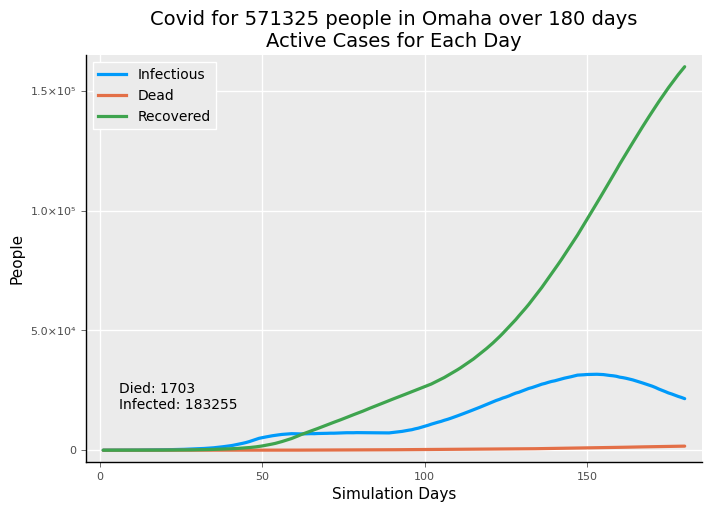

Simulation completed for 180 days.
Updating cumulative statistics for locale 14.


In [26]:
cumplot(dseries, 14,[:Infectious, :Dead, :Recovered], geo=geo)

Finally, for comparison here is what Omaha, NE could look like with no social distancing at all.

In [27]:
alldict, dseries, starting_unexposed = run_a_sim(180, 14, silent=true,
    spreadcases=[],
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 14....
*** seed day 8 locale 14....


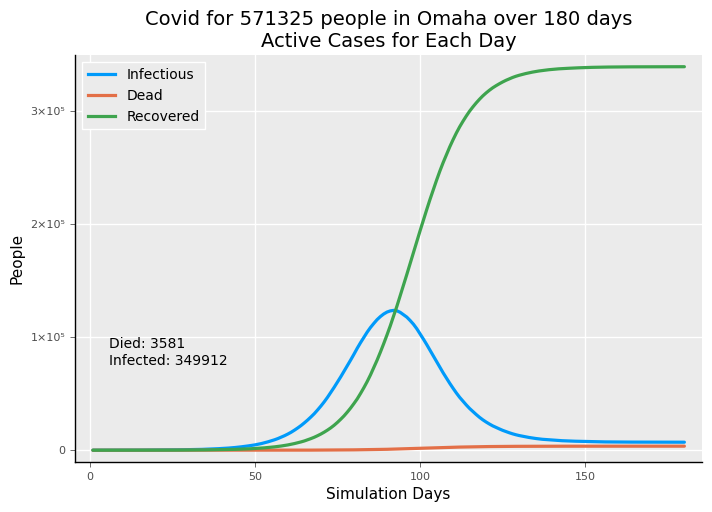

Simulation completed for 180 days.
Updating cumulative statistics for locale 14.


In [27]:
cumplot(dseries, 14,[:Infectious, :Dead, :Recovered], geo=geo)